In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [2]:
PYPL = yf.download("PYPL", start="2020-01-01", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
S = PYPL['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 186.13 .


In [4]:
log_return = np.log(PYPL['Adj Close'] / PYPL['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 53.59 %


In [5]:
VIX = yf.download("^VIX", start="2020-01-01", end="2020-10-31")

[*********************100%***********************]  1 of 1 completed


In [6]:
VIX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,14.840000,15.390000,13.750000,13.780000,13.780000,0
2020-01-02,13.460000,13.720000,12.420000,12.470000,12.470000,0
2020-01-03,15.010000,16.200001,13.130000,14.020000,14.020000,0
2020-01-06,15.450000,16.389999,13.540000,13.850000,13.850000,0
2020-01-07,13.840000,14.460000,13.390000,13.790000,13.790000,0
...,...,...,...,...,...,...
2020-10-26,29.379999,33.680000,29.219999,32.459999,32.459999,0
2020-10-27,32.040001,33.770000,31.850000,33.349998,33.349998,0
2020-10-28,34.689999,40.770000,34.680000,40.279999,40.279999,0


In [7]:
print('The market volatility is', round(VIX['Adj Close'][-1],2) , '% .')

The market volatility is 38.02 % .


In [8]:
PYPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,107.540001,108.449997,107.199997,108.169998,108.169998,4080500
2020-01-02,109.470001,111.209999,109.275002,110.750000,110.750000,7418800
2020-01-03,109.489998,110.419998,108.760002,108.760002,108.760002,7098300
2020-01-06,107.570000,110.220001,107.440002,110.169998,110.169998,6764500
2020-01-07,111.500000,111.559998,109.529999,109.669998,109.669998,6898700


In [9]:
PYPL['Adj Close'].head()

Date
2019-12-31    108.169998
2020-01-02    110.750000
2020-01-03    108.760002
2020-01-06    110.169998
2020-01-07    109.669998
Name: Adj Close, dtype: float64

In [15]:
initial_data = yf.download("PYPL ^VIX", start="2020-01-01", end="2020-10-31")

[*********************100%***********************]  2 of 2 completed


In [17]:
initial_data.head()

Adj Close              Close               High             \
                  PYPL   ^VIX        PYPL   ^VIX        PYPL       ^VIX   
Date                                                                      
2019-12-31  108.169998  13.78  108.169998  13.78  108.449997  15.390000   
2020-01-02  110.750000  12.47  110.750000  12.47  111.209999  13.720000   
2020-01-03  108.760002  14.02  108.760002  14.02  110.419998  16.200001   
2020-01-06  110.169998  13.85  110.169998  13.85  110.220001  16.389999   
2020-01-07  109.669998  13.79  109.669998  13.79  111.559998  14.460000   

                   Low               Open          Volume       
                  PYPL   ^VIX        PYPL   ^VIX     PYPL ^VIX  
Date                                                            
2019-12-31  107.199997  13.75  107.540001  14.84  4080500    0  
2020-01-02  109.275002  12.42  109.470001  13.46  7418800    0  
2020-01-03  108.760002  13.13  109.489998  15.01  7098300    0  
2020-01-06  107.440002  13.54  107.570000  15.45  6764500    0  
2020-01-07  109.529999  13.39  111.500000  13.84  6898700    0

In [18]:
initial_data['Adj Close'].head()

,PYPL,^VIX
Date,,
2019-12-31,108.169998,13.78
2020-01-02,110.750000,12.47
2020-01-03,108.760002,14.02
2020-01-06,110.169998,13.85
2020-01-07,109.669998,13.79


In [19]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212 entries, 2019-12-31 to 2020-10-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PYPL    212 non-null    float64
 1   ^VIX    212 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


In [20]:
data.tail()

,PYPL,^VIX
Date,,
2020-10-26,197.220001,32.459999
2020-10-27,200.429993,33.349998
2020-10-28,192.309998,40.279999
2020-10-29,195.039993,37.590000
2020-10-30,186.130005,38.020000


In [21]:
data.head()

,PYPL,^VIX
Date,,
2019-12-31,108.169998,13.78
2020-01-02,110.750000,12.47
2020-01-03,108.760002,14.02
2020-01-06,110.169998,13.85
2020-01-07,109.669998,13.79


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

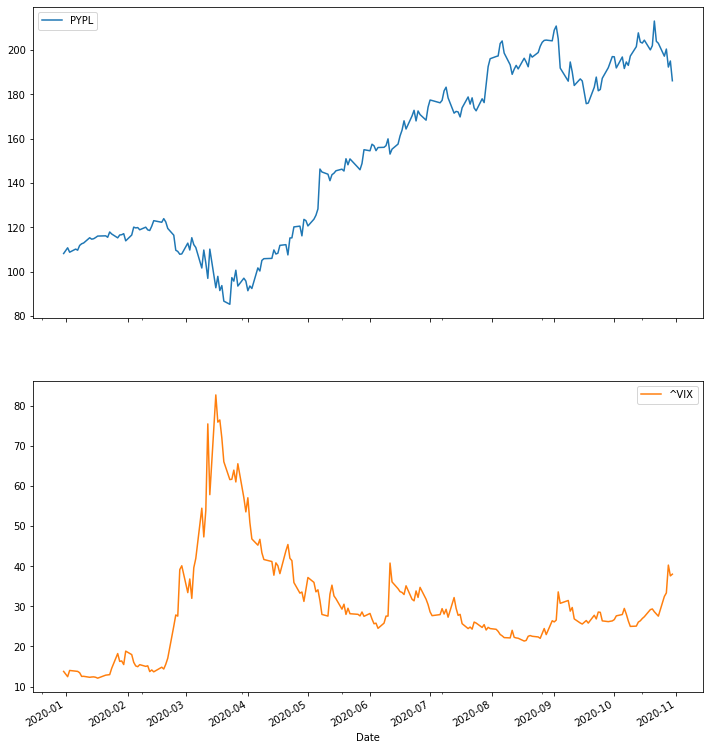

In [22]:
data.plot(figsize=(12, 14), subplots=True)

In [23]:
data.describe().round(2)

,PYPL,^VIX
count,212.00,212.00
mean,151.36,30.29
std,37.95,13.16
min,85.26,12.10
25%,115.27,23.96
50%,154.81,27.77
75%,188.09,33.71
max,213.07,82.69
